<a href="https://colab.research.google.com/github/connect2saurabh/Saurabh-EDA-Goggle-Playstore/blob/main/Saurabh_Project_Google_Play_Store_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Name***    -  **Google Play Store Analysis**

---



---





#### **Project Type**    - EDA
#### **Contribution**    - Individual submitted by *SAURABH S. SHINDE*

---




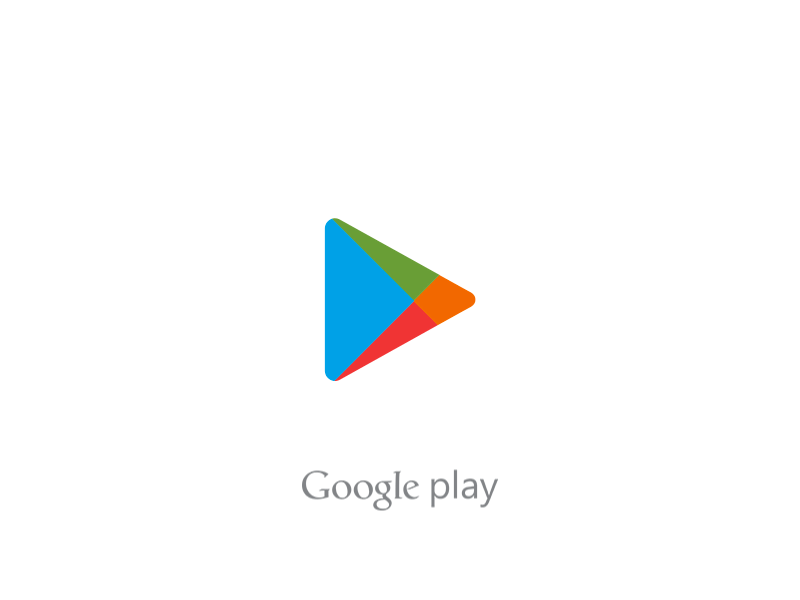

---

# **Project Summary -**

The Google Playstore Analysis is presented by me. The datasets for the project were provided by Almabetter Team. One of the dataset is of Playstore's Data Analysis and another one is of User Reviews. The purpose of selecting this project is to get the insight of applications domain used in Android Mobile Phones/Tablets. Which is a challenging task. 

The project started from idea of analysis of Playstore and uploading of both the datasets. We started with cleaning the datasets and provided them required modifications in order to gain the right data from dataset. After all this, we got the right insights about the objectives that we have used in our project.

In this project, we have extracted 8 objectives from first dataset and 5-6 objectives from second dataset. We have analysed all the objectives and provided them with proper wrangling and visualization through which we have had able to solve our objectives. After that we concluded our project with the results which we have observed through our work. 


```
The findings of the project are as follows: 

* Maximum Number of Apps in the Store are from the "Family' and 'Game' Category.
* Most of the Apps hold a rating of above 4.0 easily.
* A total of 271 Apps have 5.0 Rating.
* The most famous Apps like WhatsApp, Facebook and Instagram are the most reviewed Apps.
* 93% of the Apps are free in the Play Store.
* The costliest App is 'I am Rich- Trump Edition', which is of $400!
* Apps related to Education, LifeStyle and Tools seem to fetch full Ratings.

```






---

# **GitHub Link -**

Provide your GitHub Link here.



---



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
data1 = pd.read_csv('/Play Store Data.csv')
data2 = pd.read_csv('/User Reviews.csv')

### Dataset First View

In [ ]:
# First Look of Datasets

data1      #Glance over first dataset

In [ ]:
data2      #Glance over second dataset

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(data1.shape)
print(data2.shape)

(10841, 13)
(64295, 5)


Playstore Analysis original file contains 10841 rows and 13 columns whereas 

Playstore User Review original file contains 64295 rows and 5 columns.

### Dataset Information

In [ ]:
# Dataset Info
print(data1.info())
print(data2.info())

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data1[data1.duplicated(keep='first')]    # Selecting duplicate rows 

In [ ]:
data2[data2.duplicated(keep='first')]    # Selecting duplicate rows 

In [9]:
data1.drop_duplicates(inplace=True)      #Removing duplicate entries from datasets
data2.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(data1.isnull().sum())
print(data2.isnull().sum())

In [ ]:
data1.dropna(inplace=True) #Dropping Rows with Null values
data1

In [ ]:
data2.dropna(inplace=True) #Dropping Rows with Null values
data2

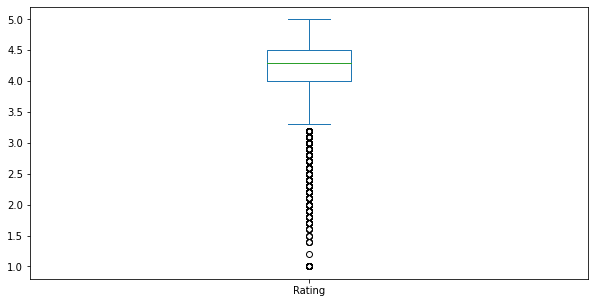

In [13]:
# Visualizing the missing values
plt.rcParams['figure.figsize']=(10,5)     #for dataset1
data1.plot(kind='box');

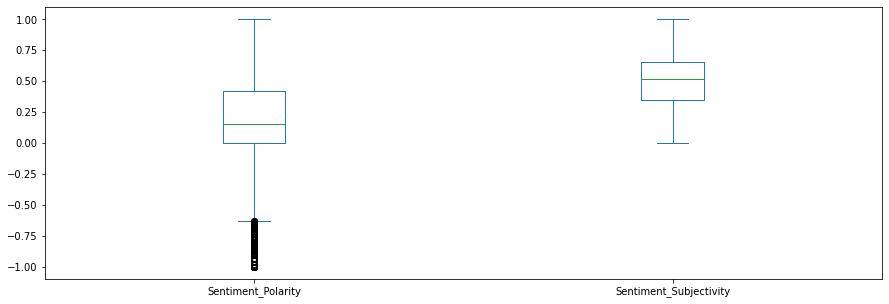

In [109]:
plt.rcParams['figure.figsize']=(15,5)     #for dataset2
data2.plot(kind='box');

These boxplot shows us the values that are present inside and outside the outlier range. 


*This box plot which has been used here is better choice to visualize the data inside and outside particular range rather than any other graph.*

## **Let's proceed with our first dataset, Google Play Store Analysis!**
---


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
tuple(data1.columns)

In [ ]:
# Let's check info too
data1.info()

### Variables Description 

#### Exploring the columns

* **'App'**- *Application name*

* **'Category'**- *The category to which app belongs to (Type of App)*

* **'Rating'**- *Rating of the App in Play Store*

* **'Reviews'**- *No of reviews application got from users*

* **'Size'**- *Size of the App (In MB/GB/KB...)*

* **'Installs'**- *No of times app installed by users*

* **'Type'**- *App catgory either Free or Paid*

* **'Price'**- *Applicaton price*

* **'Content Rating'**- *A categorical rating of the app to indicate which age group it is suitable for.*

* **'Genres'**- *Movie belongs to which Genre.(A subset of Category)*

* **'Last Updated'**- *Last updated date of the app*

* **'Current Ver'**- *Current available version of the app*

* **'Android Ver'**- *Minimum android version required to support the app*







---



##  ***3. Data Wrangling***

#### Before moving ahead some more cleaning needed

In the data set some columns consists features that needs to be converted into numeric format for some logical and comparision operations.


##### The feature **Reviews** must be of *numerical type*.

#### **3.1 Reviews**


In [17]:
# 1. Reviews

data1['Reviews']=data1['Reviews'].astype('int64')  #Reviews column was in other datatype format. Converted into integer format.

##### Other features like **Size, Installs, Price** and **Android Ver** also must be of *numeric type*.



#### **3.2 Size**


In [18]:
# 2. Size

newSize = []

for row in data1.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) 
    
data1.Size = newSize                  #Sizes of applications are converted from string to integer format

data1.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

#### **3.3 Installs**



In [19]:
# 3. Installs

newInstalls = []

for row in data1.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(int(newRow))
    

data1.Installs = newInstalls           #Installs of applications are converted from string to integer format

data1.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

#### **3.4 Price**


In [20]:
# 4. Price

newPrice = []

for row in data1.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
data1.Price = newPrice                      #Prices of applications are converted from string to integer format

data1.Price.head()
    

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

#### **3.5 Android Ver**


In [21]:
# 5. Android Ver

newVer = []

for row in data1['Android Ver']:
    try:
        newrow = float(row[:2])          
    except:
        newrow = 0  
    
    newVer.append(newrow)
    
data1['Android Ver'] =  newVer            #Android Ver of applications are rounded up and onverted from string to integer format

data1['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

In [22]:
# Dataset Describe
data1.describe()

,Rating,Reviews,Size,Installs,Price,Android Ver
count,8886.000000,8.886000e+03,8886.000000,8.886000e+03,8886.000000,8886.000000
mean,4.187959,4.730928e+05,31.381747,1.650061e+07,0.963526,3.229912
std,0.522428,2.906007e+06,87.911809,8.640413e+07,16.194792,1.521531
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000
25%,4.000000,1.640000e+02,3.100000,1.000000e+04,0.000000,2.000000
50%,4.300000,4.723000e+03,11.000000,5.000000e+05,0.000000,4.000000
75%,4.500000,7.131325e+04,31.000000,5.000000e+06,0.000000,4.000000
max,5.000000,7.815831e+07,994.000000,1.000000e+09,400.000000,8.000000




---





##  ***4. Analyzing Features, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **4.1 Categorywise Count of Applications**


In [23]:
category_wise_app_counts = pd.Series(data1['Category'].value_counts())     #Displaying all the categories and their counts.
category_wise_app_counts

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

Text(0, 0.5, 'Frequncy of occurance of Apps')

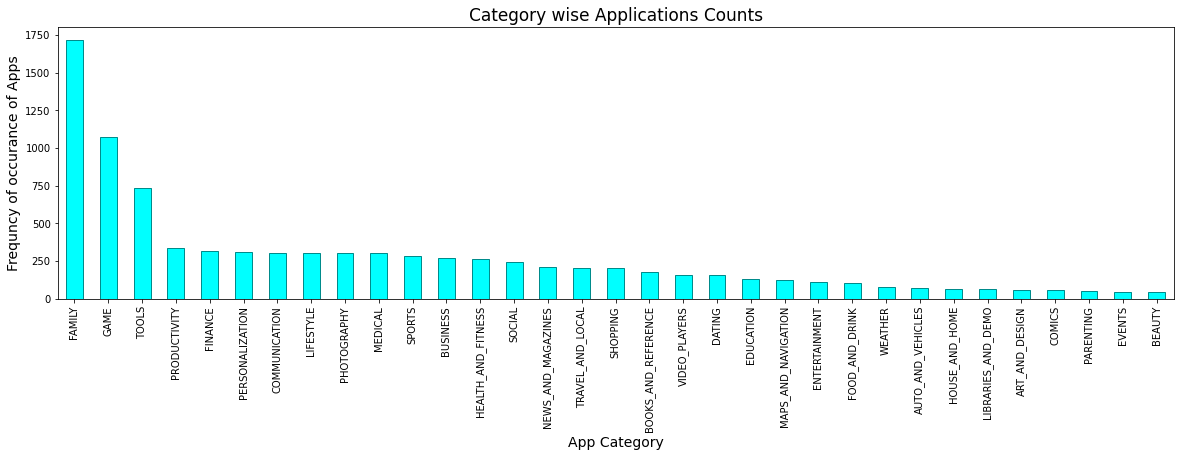

In [24]:
plt.rcParams['figure.figsize']=(20,5)
category_wise_app_counts.plot(kind='bar', color='aqua', edgecolor='darkcyan')
plt.title('Category wise Applications Counts', size=(17))
plt.xlabel('App Category', size=(14))
plt.ylabel('Frequncy of occurance of Apps', size=(14))

This graph shows us count of applications but categorywise. Family category has been highest preference as it has highest number of applications. Whereas categories such as Parenting, Events and Beauty has been given lowest preference as these contains minimum number of application.



*This bar graph is used here since it shows distibution of various categories of apps which are easy to plot and to visualize rather than any other graph.*

#### **4.2 Categorywise Count of Ratings of Applications**


In [25]:
no_of_ratings_of_app = pd.Series(data1['Rating'].value_counts())     #Displaying all the ratings and their counts.
dict(no_of_ratings_of_app)

{4.4: 1031,
 4.3: 1016,
 4.5: 976,
 4.2: 887,
 4.6: 768,
 4.1: 656,
 4.0: 538,
 4.7: 484,
 3.9: 372,
 3.8: 293,
 5.0: 271,
 3.7: 231,
 4.8: 228,
 3.6: 169,
 3.5: 157,
 3.4: 127,
 3.3: 101,
 4.9: 87,
 3.0: 82,
 3.1: 69,
 3.2: 63,
 2.9: 45,
 2.8: 40,
 2.6: 24,
 2.7: 23,
 2.5: 20,
 2.3: 20,
 2.4: 19,
 1.0: 16,
 2.2: 14,
 1.9: 12,
 2.0: 12,
 1.7: 8,
 1.8: 8,
 2.1: 8,
 1.6: 4,
 1.4: 3,
 1.5: 3,
 1.2: 1}

, edgecolor='darkcyan'

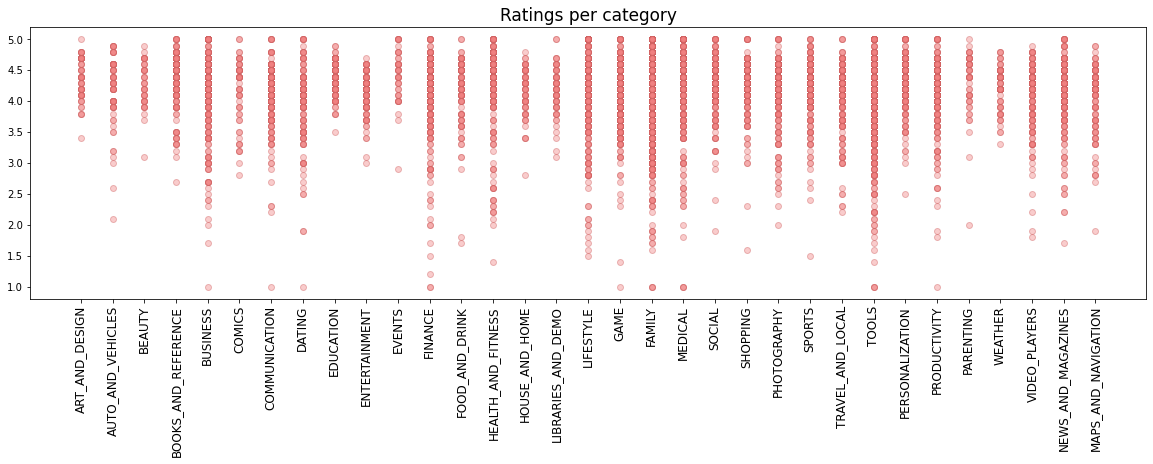

In [26]:
plt.figure(figsize=(20,5))
plt.scatter(data1['Category'], data1['Rating'], alpha = 0.4, color='lightcoral', edgecolor='indianred');
plt.title('Ratings per category', size=17);
plt.xticks(size= 12, rotation = 90);

On a scale of 1 to 5, the rating of an application that is accessible on Google Play is shown in the chart above. The graph demonstrates that, out of the 8886 apps in the sample, only 1031 received a 4.4-star rating.

*This scatter plot is used here since it shows distibution of various categories of apps with their ratings which are easy to plot and to visualize rather than any other graph.*

#### **4.2 Categorywise Count of Ratings of Applications**





#### Count of application having 5-star ratings


In [27]:
print("No. of Apps with full ratings: ",data1.Rating[data1['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


In [28]:
data1_five_star = data1[data1.Rating == 5]          #Glimpse of applications having 5-star ratings.
data1_five_star.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10721,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.0
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.0
10776,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.0
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.0


##### Number of installs of application having 5 ratings


In [29]:
data1_five_star.Installs.value_counts().sort_index()

1          3
5          8
10        48
50        32
100      112
500       27
1000      37
5000       3
10000      1
Name: Installs, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


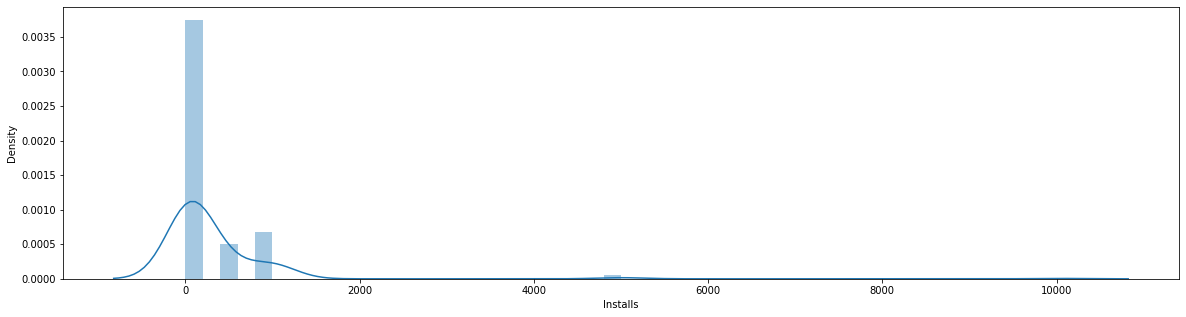

In [30]:
sns.distplot(data1_five_star.Installs)      #Distplot showing installs of five star rating

The graph demonstrates the count of installation by users among the 271 apps which has a 5-star rating 

*The distplot used here for better visualization understanding for applications installed per density which could not easily possible to show on a normal graph.*

#### **4.3 Count of Reviews of Applications**

In [31]:
data1[['App','Reviews']]

,App,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,159
1,Coloring book moana,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510
3,Sketch - Draw & Paint,215644
4,Pixel Draw - Number Art Coloring Book,967
...,...,...
10834,FR Calculator,7
10836,Sya9a Maroc - FR,38
10837,Fr. Mike Schmitz Audio Teachings,4
10839,The SCP Foundation DB fr nn5n,114


##### Classification of Reviews of applications

In [32]:
Complete_biased_numb_of_reviews = data1[data1.Reviews<=10]
Biased_numb_of_reviews = data1[(data1.Reviews<=100) & (data1.Reviews>10)]
Poor_but_considerable_numb_of_reviews = data1[(data1.Reviews<=500) & (data1.Reviews>100)]
Poor_numb_of_reviews = data1[(data1.Reviews<=1000) & (data1.Reviews>500)]
Moderate_numb_of_reviews = data1[(data1.Reviews<=10000) & (data1.Reviews>1000)]
Good_numb_of_reviews = data1[(data1.Reviews<=100000) & (data1.Reviews>10000)]
Very_good_numb_of_reviews = data1[(data1.Reviews<=1000000) & (data1.Reviews>100000)]
Excellent_numb_of_reviews = data1[(data1.Reviews<=10000000) & (data1.Reviews>1000000)]
Legit_numb_of_reviews = data1[(data1.Reviews<=40000000) & (data1.Reviews>10000000)]
Prestigious_numb_of_reviews = data1[data1.Reviews>40000000]

Top_application = data1[['App','Reviews']].max()

In [33]:
print(f"Completely biased number of reviews = {Complete_biased_numb_of_reviews['Reviews'].count()}.")                     # String formatting 
print(f"Biased number of reviews = {Biased_numb_of_reviews['Reviews'].count()}.")
print(f"Poor but considerable number of reviews = {Poor_but_considerable_numb_of_reviews['Reviews'].count()}.")
print(f"Poor number of reviews = {Poor_numb_of_reviews['Reviews'].count()}.")
print(f"Moderate number of reviews = {Moderate_numb_of_reviews['Reviews'].count()}.")
print(f"Good number of reviews = {Good_numb_of_reviews['Reviews'].count()}.")
print(f"Very good number of reviews = {Very_good_numb_of_reviews['Reviews'].count()}.")
print(f"Excellent number of reviews = {Excellent_numb_of_reviews['Reviews'].count()}.")
print(f"Legit number of reviews = {Legit_numb_of_reviews['Reviews'].count()}.")
print(f"Prestigious number of reviews = {Prestigious_numb_of_reviews['Reviews'].count()}.")

Completely biased number of reviews = 633.
Biased number of reviews = 1275.
Poor but considerable number of reviews = 1031.
Poor number of reviews = 464.
Moderate number of reviews = 1555.
Good number of reviews = 1957.
Very good number of reviews = 1330.
Excellent number of reviews = 563.
Legit number of reviews = 65.
Prestigious number of reviews = 13.


In [34]:
reviews_analysis = {'Complete_biased_numb_of_reviews':633,'Biased_numb_of_reviews':1275,'Poor_but_considerable_numb_of_reviews':1031,'Poor_numb_of_reviews':464,'Moderate_numb_of_reviews':1555,'Good_numb_of_reviews':1957,'Very_good_numb_of_reviews':1330,'Excellent_numb_of_reviews':563,'Legit_numb_of_reviews':65,'Prestigious_numb_of_reviews':13}

##### Graphical review of Reviews of applications

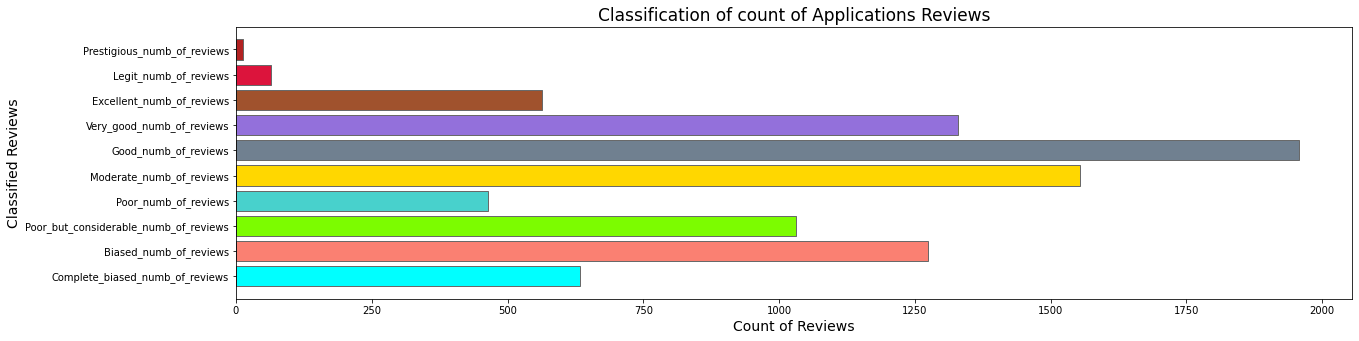

In [110]:
plt.rcParams['figure.figsize']=(20,5)

reviews_analysis 
categorised_reviews = list(reviews_analysis.keys())
number_of_reviews = list(reviews_analysis.values())

c = ['cyan','salmon', 'lawngreen', 'mediumturquoise','gold','slategray','mediumpurple','sienna','crimson','firebrick']

plt.barh(range(len(reviews_analysis)), number_of_reviews, tick_label=categorised_reviews, color = c, edgecolor='dimgray')
plt.title('Classification of count of Applications Reviews', size=(17))
plt.xlabel('Count of Reviews', size=(14))
plt.ylabel('Classified Reviews', size=(14))

plt.show()

The graph displays the number of reviews broken down by category, and while good number of reviews received a sizable number (1957), there is only one app that takes first position as the "Top application" with the most reviews.

*Horizontal Bar Graph is used here as it always draw attention and since the number of columns is limited, various shades for each column is also doable.*

##### Application which has most number of reviews


In [36]:
data1[data1.Reviews == data1.Reviews.max()]   #This will be our top application 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0


 **Facebook** is the application which has most number of reviews

#### **4.4 Categorywise Count of Installs of Applications**

In [37]:
app_installs_by_category = data1.groupby('Category')['Installs'].sum().sort_values(ascending=False)
app_installs_by_category

Category
GAME                   31543862717
COMMUNICATION          24152241530
SOCIAL                 12513841475
PRODUCTIVITY           12463070180
TOOLS                  11450224500
FAMILY                 10041080590
PHOTOGRAPHY             9721243130
TRAVEL_AND_LOCAL        6361859300
VIDEO_PLAYERS           6221897200
NEWS_AND_MAGAZINES      5393110650
SHOPPING                2573331540
ENTERTAINMENT           2455660000
PERSONALIZATION         2074341930
BOOKS_AND_REFERENCE     1916291655
SPORTS                  1528531465
HEALTH_AND_FITNESS      1361006220
BUSINESS                 863518120
FINANCE                  770312400
MAPS_AND_NAVIGATION      724267560
LIFESTYLE                534741120
EDUCATION                533852000
WEATHER                  426096500
FOOD_AND_DRINK           257777750
DATING                   206522410
HOUSE_AND_HOME           125082000
ART_AND_DESIGN           124228100
LIBRARIES_AND_DEMO        61083000
COMICS                    56036100
AUTO_AND_VE

Text(0, 0.5, 'Frequncy of installation of Apps')

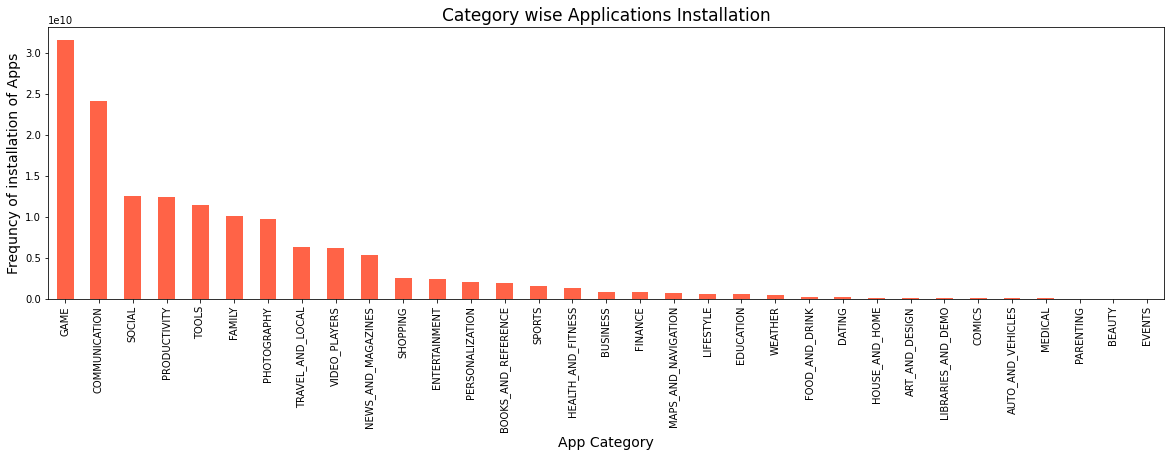

In [38]:
plt.rcParams['figure.figsize']=(20,5)
app_installs_by_category.plot(kind='bar', color='tomato')

plt.title('Category wise Applications Installation', size=(17))
plt.xlabel('App Category', size=(14))
plt.ylabel('Frequncy of installation of Apps', size=(14))

This graph displays the frequency of app installation by category. The gaming category has the highest frequency, followed by communication, while parenting, beauty, and events were at the bottom.

#### **4.5 Categorywise Count of Content Rating of Applications**

In [39]:
app_category_rating = data1.groupby('Category')['Content Rating'].value_counts().sort_values(ascending=False)
app_category_rating

Category             Content Rating
FAMILY               Everyone          1306
TOOLS                Everyone           726
GAME                 Everyone           556
PRODUCTIVITY         Everyone           330
GAME                 Teen               319
                                       ... 
PRODUCTIVITY         Everyone 10+         1
PARENTING            Mature 17+           1
MAPS_AND_NAVIGATION  Mature 17+           1
EDUCATION            Teen                 1
WEATHER              Mature 17+           1
Name: Content Rating, Length: 113, dtype: int64

##### A check on types of Content Rating

In [40]:
(data1['Content Rating'] == 'Everyone').value_counts()

True     7089
False    1797
Name: Content Rating, dtype: int64

In [41]:
(data1['Content Rating'] == 'Unrated').value_counts()

False    8885
True        1
Name: Content Rating, dtype: int64

In [42]:
(data1['Content Rating'] == 'Teen').value_counts()

False    7864
True     1022
Name: Content Rating, dtype: int64

In [43]:
(data1['Content Rating'] == 'Mature 17+').value_counts()

False    8475
True      411
Name: Content Rating, dtype: int64

In [44]:
(data1['Content Rating'] == 'Everyone 10+').value_counts()

False    8526
True      360
Name: Content Rating, dtype: int64

In [45]:
(data1['Content Rating'] == 'Adults only 18+').value_counts()

False    8883
True        3
Name: Content Rating, dtype: int64

#### **4.6 Count of Sizes of Applications**

In [46]:
data1[['App','Size']]

,App,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0
1,Coloring book moana,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7
3,Sketch - Draw & Paint,25.0
4,Pixel Draw - Number Art Coloring Book,2.8
...,...,...
10834,FR Calculator,2.6
10836,Sya9a Maroc - FR,53.0
10837,Fr. Mike Schmitz Audio Teachings,3.6
10839,The SCP Foundation DB fr nn5n,0.0


Now, apps with integers significantly larger than or equals to 100 have sizes noted in KB, whereas the apps with integers less than 100 have sizes noted in MB.

##### Graph of Reviews of applications

In [ ]:
size_in_MB = data1[data1.Size<100]                        # Tracking down the applications which have sizes in MB
size_in_MB

In [48]:
size_in_KB = data1[data1.Size>100]                        # Tracking down the applications which have sizes in KB
size_in_KB

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201.0,100000,Free,0.0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.0
450,Caller ID +,COMMUNICATION,4.0,9498,118.0,1000000,Free,0.0,Everyone,Communication,"June 7, 2016",5.28.0,2.0
458,GO Notifier,COMMUNICATION,4.2,124346,695.0,10000000,Free,0.0,Everyone,Communication,"July 6, 2014",2.8,2.0
768,Pocket GMAT Math,EDUCATION,4.3,656,556.0,10000,Free,0.0,Everyone,Education,"July 11, 2014",1.1,2.0
775,Pocket SAT Math,EDUCATION,4.0,430,526.0,10000,Free,0.0,Everyone,Education,"July 11, 2014",1.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467.0,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676.0,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.0
10763,FP Разбитый дисплей,FAMILY,4.5,922,552.0,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.0
10832,FR Tides,WEATHER,3.8,1195,582.0,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.0


In [49]:
size_in_KB[size_in_KB .Size == size_in_KB .Size.min()]                # Smallest app by size in the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7241,CF-Bench,TOOLS,4.4,2132,103.0,100000,Free,0.0,Everyone,Tools,"July 3, 2013",1.3,2.0


In [ ]:
largest_app = size_in_MB[size_in_MB.Size == size_in_MB.Size.max()]    # Largest app by size in the dataset.
largest_app

#### **4.7 Count of Prices of Applications**

In [51]:
# Type - Free or Paid
data1['Type'].value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

In [52]:
# Maximum Price 
data1[data1.Price == data1.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


**'I'm Rich - Trump Edition'** is the most expensive application in the entire dataset.

([<matplotlib.patches.Wedge at 0x7f91296c1e50>,
 [Text(-0.23577334560188037, -1.0744351676595925, 'Free'),
  Text(0.2572073409816228, 1.1721110799515393, 'Paid')],
 [Text(-0.1286036430555711, -0.5860555459961413, '93.1%'),
  Text(0.15003761557261328, 0.6837314633050644, '6.9%')])

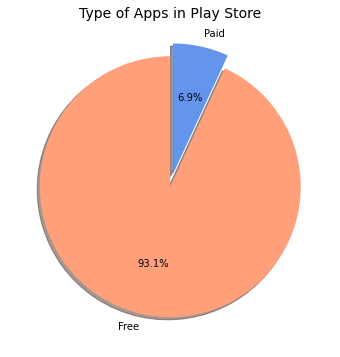

In [98]:
plt.rcParams['figure.figsize']=(20,6)
plt.title('Type of Apps in Play Store', size=14);
plt.pie(data1.Type.value_counts(), labels=['Free', 'Paid'], shadow = True, colors=['lightsalmon','cornflowerblue'], explode = (0,0.1), startangle=90, autopct='%1.1f%%')

This pie chart displays the different kinds (free or paid) of apps that are offered on the Google Play App Store. It demonstrates that around 93% of the apps on the Google Play store are free to download and use; the remaining 7% are charged.

#### **4.8 Count of Android Ver of Applications**

In [54]:
#Android version
data1['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


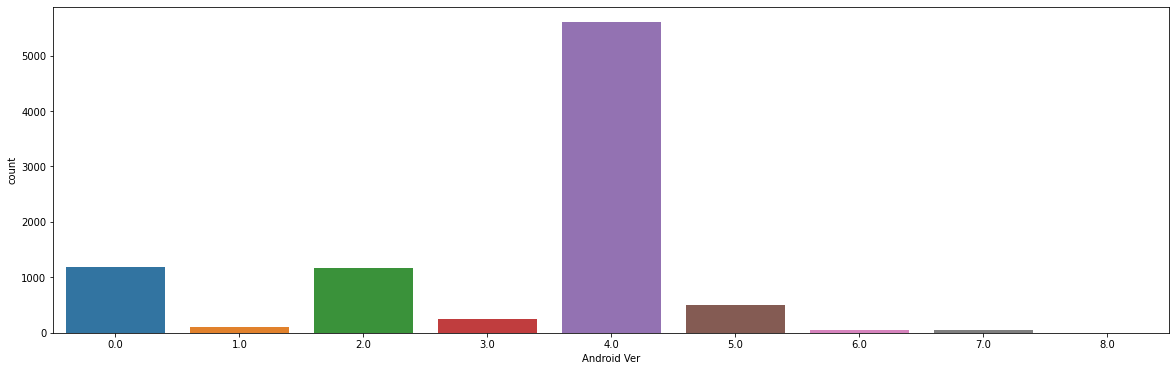

In [55]:
sns.countplot(data1['Android Ver'])

This countplot of Android apps on the Google Play Store shows that, of the 8887 total apps, just 5 are from the top-rated Android version 8.0 category, while the largest number, 5602, are from the Android version 4.0 category.

#### **4.9 Establishing Heatmap of Rating, Reviews and Size of Applications**



In [56]:
y = data1[['Rating','Reviews','Installs']]

corr_data1 = y.corr()
corr_data1

,Rating,Reviews,Installs
Rating,1.000000,0.068724,0.050869
Reviews,0.068724,1.000000,0.633422
Installs,0.050869,0.633422,1.000000


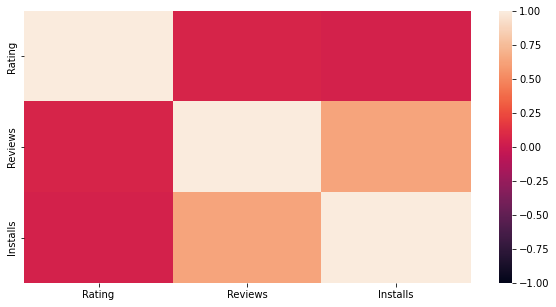

In [57]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(corr_data1,vmin=-1,vmax=1);

The corresponding heatmap shows that apps with higher ratings received varied reviews with varied installs.



---



# ***Let's Go For Second Data Set***

In [58]:
data2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


### ***Let's Explore Columns***

1. Apps: Name of the App on which the review is about.

2. Translated_Reviews: what the review giver says about the app (English Language Statement)

3. Sentiment: Either the review statement reflects possitive, negative or neutral based on its verbal meaning.

4. Sentimen polarity and subjectivity are techniques used in sentiment analysis in NLP. Polarity refers to how much positive or negative or neutral review statement reflects. Subjectivity refers to personal opinion, emotion or judgement in a review.

Sentiment_Polarity: Numerical representation of how much postive or negative or neutral the review statement reflects ranged from -1 to 1. (-1) is towards negative sentiment while(+1) is towards positive sentiment and 0 is neutral.

5. Sentiment_Subjectivity: Numerical representation of someone's personal opinion, emotion or judgementin a review.




# ***5. Data Analysis and Visualization***

In [99]:
data2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [60]:
data2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


#### 5.1 User Sentiment counting 

In [59]:
data2.groupby('Sentiment').count()    

,App,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment,,,,
Negative,6321,6321,6321,6321
Neutral,4356,4356,4356,4356
Positive,19015,19015,19015,19015


#### Sentiment for apps 

In [61]:
review=data2.groupby(['App', 'Sentiment']).count()[['Translated_Review']]  #Review of Apps
review

Translated_Review
App                              Sentiment                   
10 Best Foods for You            Negative                   5
                                 Neutral                   11
                                 Positive                  79
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室 Negative                   1
                                 Neutral                    8
...                                                       ...
Hotwire Hotel & Car Rental App   Neutral                   11
                                 Positive                  16
Housing-Real Estate & Property   Negative                  10
                                 Neutral                    3
                                 Positive                   8

[2376 rows x 1 columns]

#### 5.2 Data showing **Positive** sentiment 

In [62]:
positive_data2= data2[data2['Sentiment']=='Positive']       #Positive review
positive_data2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with highest number of positive reviews')

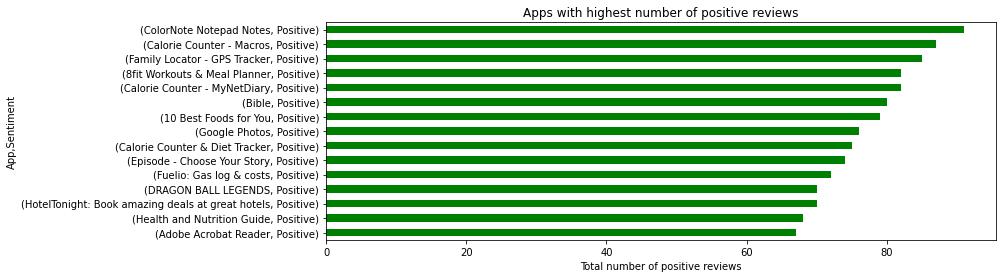

In [63]:
import matplotlib.pyplot as plt
positive_data2.groupby('App')['Sentiment'].value_counts().nlargest(15).plot.barh(figsize=(12,4), color='green').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with highest number of positive reviews')

This horizontal bar graph displays the greatest number of positive user feelings, clearly indicating that **"ColorNote, Notepad Notes"** is leading the pack.

#### 5.3 Data showing **Negative** sentiment 

In [64]:
negative_data2= data2[data2['Sentiment']== 'Negative']       #Negative review
negative_data2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with highest number of negative reviews')

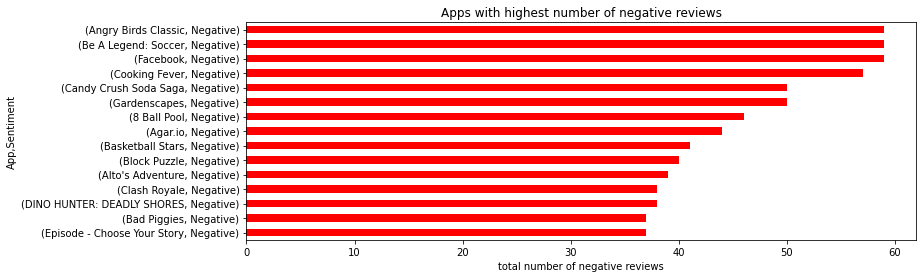

In [65]:
import matplotlib.pyplot as plt
negative_data2.groupby('App')['Sentiment'].value_counts().nlargest(15).plot.barh(figsize=(12,4), color='red').invert_yaxis()
plt.xlabel('total number of negative reviews')
plt.title('Apps with highest number of negative reviews')

This horizontal bar graph displays the greatest number of negative user feelings, clearly indicating that **"Angry Birds Classic, Be A Legend:Soccer, Facebook"** is leading the pack.

#### 5.4 Data showing **Neutral** sentiment 

In [66]:
neutral_data2= data2[data2['Sentiment']== 'Neutral']       #Neutral review
neutral_data2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0
...,...,...,...,...,...
64189,Hotwire Hotel & Car Rental App,Solid app. No issues yet. Been using year.,Neutral,0.0,0.1
64194,Hotwire Hotel & Car Rental App,"Keeps telling there's problem date time, can't...",Neutral,0.0,0.0
64200,Housing-Real Estate & Property,Why business? Your filters don't work.. redire...,Neutral,0.0,0.0
64205,Housing-Real Estate & Property,I want list property sale option. Please connect,Neutral,0.0,0.0


Text(0.5, 1.0, 'Apps with highest number of neutral reviews')

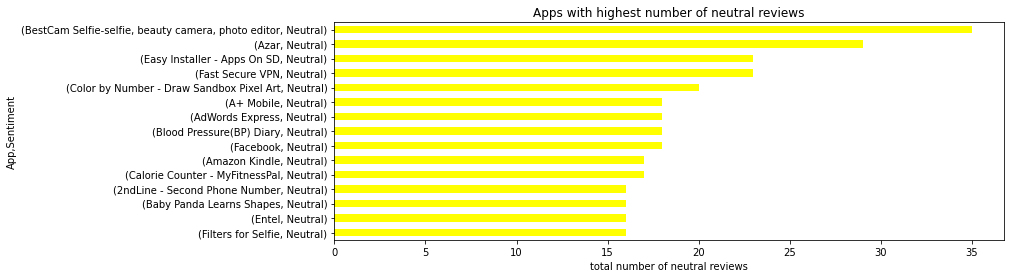

In [67]:
import matplotlib.pyplot as plt
neutral_data2.groupby('App')['Sentiment'].value_counts().nlargest(15).plot.barh(figsize=(12,4), color='yellow').invert_yaxis()
plt.xlabel('total number of neutral reviews')
plt.title('Apps with highest number of neutral reviews')

This horizontal bar graph displays the greatest number of neutral user feelings, clearly indicating that **"BestCam Selfie-selfie, beauty camera, photo editor"** is leading the pack.

#### 5.5 Data showing **Combined** sentiment 

In [68]:
top_most_positive_apps = positive_data2.groupby('App').count()[['Sentiment']]
top_most_positive_apps.sort_values(by='Sentiment',ascending=False).head(10) #printing the data in ascending orders from maximum

,Sentiment
App,
ColorNote Notepad Notes,91
Calorie Counter - Macros,87
Family Locator - GPS Tracker,85
8fit Workouts & Meal Planner,82
Calorie Counter - MyNetDiary,82
Bible,80
10 Best Foods for You,79
Google Photos,76
Calorie Counter & Diet Tracker,75


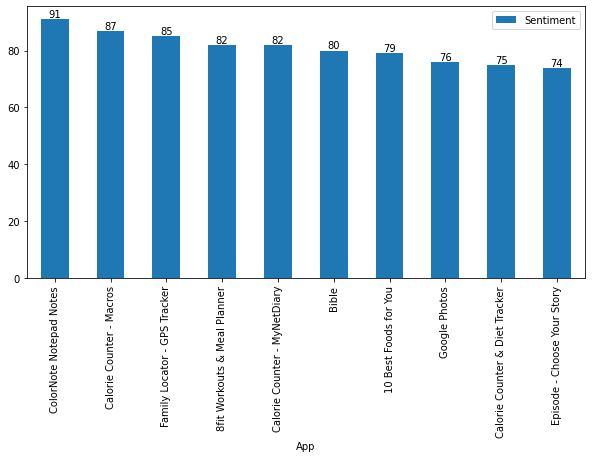

In [69]:
plot = top_most_positive_apps.sort_values(by='Sentiment',ascending=False).head(10).plot(kind='bar')

for bar in plot.patches:
    plot.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')

This is a combine plot of user app's sentiment with positive sentiment for application **"ColorNote Notepad Notes"** being at the Top on a scale of 100.



---



#### 5.6 Data showing **Percentages of Sentiment**  

In [70]:
top_most_negative_apps = negative_data2.groupby('App').count()[['Sentiment']]
top_most_negative_apps.sort_values(by='Sentiment',ascending=False).head(10)

,Sentiment
App,
Facebook,59
Be A Legend: Soccer,59
Angry Birds Classic,59
Cooking Fever,57
Candy Crush Soda Saga,50
Gardenscapes,50
8 Ball Pool,46
Agar.io,44
Basketball Stars,41


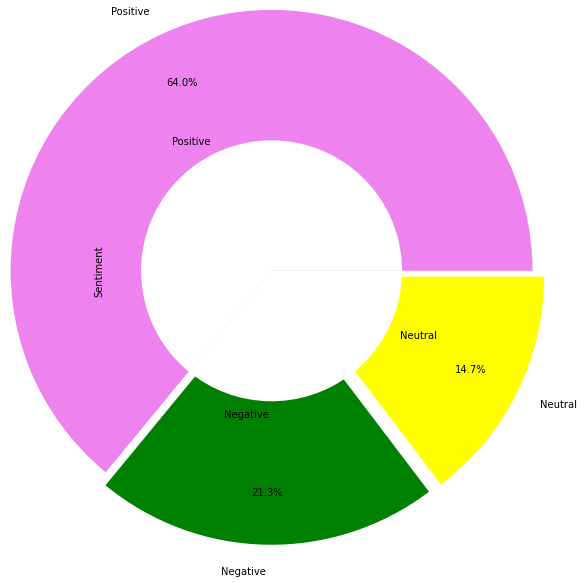

In [101]:
explode=(0.0, 0.1, 0.1)
data2['Sentiment'].value_counts().plot.pie(autopct='%.1f%%', radius=2, colors=['violet','green','yellow'], pctdistance=0.80, explode=explode)
data2['Sentiment'].value_counts().plot.pie(radius=1,colors=['w'], pctdistance=0.90)

The DonutPie shows the pecentages of positive negative and Neutral revies which stands at ***64% reviews are positive, 22% are neutral, 14% are negative.*** Reviews.

*This pie plot is used here since it shows distibution of percentage between three diffrent categories which is easy to plot and to visualize rather than any other graph.*



---



#### 5.7 Classification of **Sentiment Polarity**

In [72]:
major_negative_polarity= data2[(data2.Sentiment_Polarity>=-1) & (data2.Sentiment_Polarity<-0.5)]
minor_negative_polarity=data2[(data2.Sentiment_Polarity>=-0.5) & (data2.Sentiment_Polarity<0)]
minor_positve_polarity= data2[(data2.Sentiment_Polarity>=0) & (data2.Sentiment_Polarity<0.5)]
major_positive_polarity= data2[(data2.Sentiment_Polarity>=0.5) & (data2.Sentiment_Polarity<1)]

In [73]:
print('major_negative_polarity = ',major_negative_polarity['Sentiment_Polarity'].count() )
print('minor_negative_polarity = ',minor_negative_polarity['Sentiment_Polarity'].count() )
print('minor_positve_polarity = ',minor_positve_polarity['Sentiment_Polarity'].count() )
print('major_positive_polarity = ',major_positive_polarity['Sentiment_Polarity'].count() )

major_negative_polarity =  786
minor_negative_polarity =  5535
minor_positve_polarity =  17147
major_positive_polarity =  5410


In [74]:
sentiment_polarity_analysis={'major_negative_polarity':976, 'minor_negative_polarity':7295, 'minor_positve_polarity':21655, 'major_positive_polarity':6547}

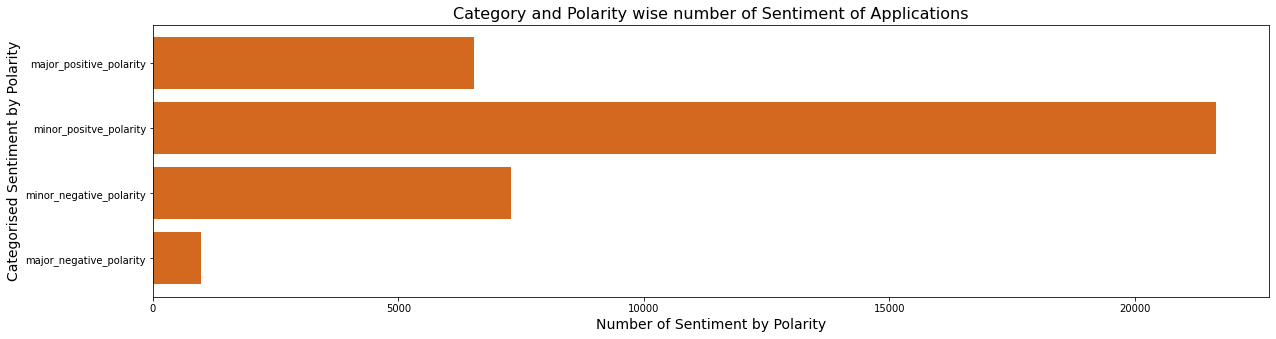

In [107]:
plt.rcParams['figure.figsize']=(20,5)
sentiment_polarity_analysis 
categorised_sentiment = list(sentiment_polarity_analysis.keys())
number_of_sentiment = list(sentiment_polarity_analysis.values())

plt.barh(range(len(sentiment_polarity_analysis)), number_of_sentiment, tick_label=categorised_sentiment, color='chocolate')
plt.title('Category and Polarity wise number of Sentiment of Applications', size=(16))
plt.xlabel('Number of Sentiment by Polarity', size=(14))
plt.ylabel('Categorised Sentiment by Polarity', size=(14))
plt.show()

Corresponding horizontal bar graph shows category and Polarity wise number of Sentiment of Applications in which minor positive polarity (ranging from 0 to 0.5) got the highest number of sentiment count of users. 

#### 5.8 Classification of **Sentiment Subjectivity**

In [76]:
major_min_subjectivity = data2[(data2.Sentiment_Subjectivity>=0) & (data2.Sentiment_Subjectivity<0.25)]
minor_min_subjectivity = data2[(data2.Sentiment_Subjectivity>=0.25) & (data2.Sentiment_Subjectivity<0.5)]
minor_max_subjectivity = data2[(data2.Sentiment_Subjectivity>=0.5) & (data2.Sentiment_Subjectivity<0.75)]
major_max_subjectivity = data2[(data2.Sentiment_Subjectivity>=0.75) & (data2.Sentiment_Subjectivity<1)]

In [77]:
print('major_min_subjectivity = ',major_min_subjectivity['Sentiment_Subjectivity'].count() )
print('minor_min_subjectivity = ',minor_min_subjectivity['Sentiment_Subjectivity'].count() )
print('minor_max_subjectivity = ',minor_max_subjectivity['Sentiment_Subjectivity'].count() )
print('major_max_subjectivity = ',major_max_subjectivity['Sentiment_Subjectivity'].count() )

major_min_subjectivity =  5182
minor_min_subjectivity =  7901
minor_max_subjectivity =  11691
major_max_subjectivity =  3470


In [78]:
sentiment_subjectivity_analysis={'major_min_subjectivity':5182, 'minor_min_subjectivity':7901, 'minor_max_subjectivity':11691, 'major_max_subjectivity':3470}

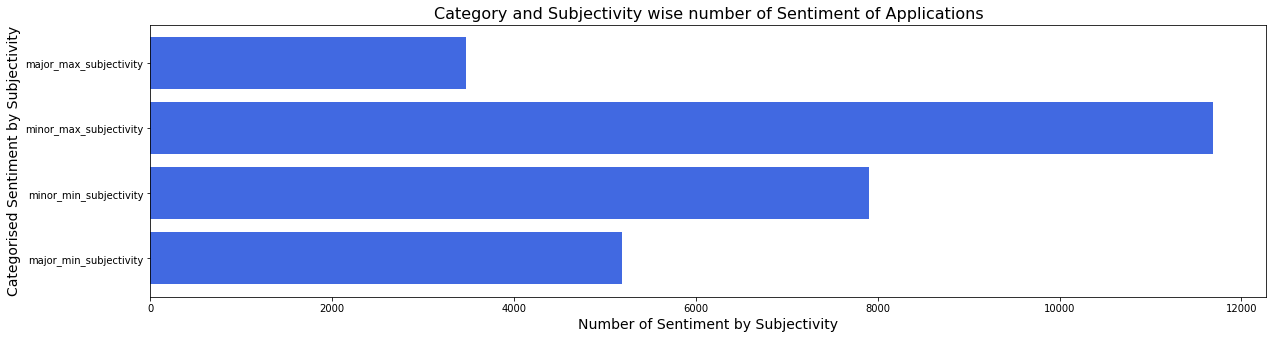

In [106]:
plt.rcParams['figure.figsize']=(20,5)
sentiment_subjectivity_analysis 
categorised_sentiment2 = list(sentiment_subjectivity_analysis.keys())
number_of_sentiment2 = list(sentiment_subjectivity_analysis.values())

plt.barh(range(len(sentiment_subjectivity_analysis)), number_of_sentiment2, tick_label=categorised_sentiment2, color='royalblue')
plt.title('Category and Subjectivity wise number of Sentiment of Applications', size=(16))
plt.xlabel('Number of Sentiment by Subjectivity', size=(14))
plt.ylabel('Categorised Sentiment by Subjectivity', size=(14))
plt.show()

Corresponding horizontal bar graph shows category and subjectivity wise number of Sentiment of Applications in which minor max subjectivity (ranging from 0.5 to 0.75) got the highest number of sentiment count of users. 

# **Conclusion**

### From the given project we have concluded:-
1- From the study of Category wise application count, it is concluded that family category has highest numbers of applications.

2- 4.4 star rating is the most popular rating on a scale of 1-5 which has been given to 1031 application whereas 5 star rating is given to only 271 applications.

3- Facebook application has been given the most number of reviews.

4- The study states that gaming category has maximum number of apps installations.

5- The majority of applications on play store are safe to work for Everyone.

6- The smallest app on play store is CF-Bench having size 103Kb.

7- The largest apps on play store is of 99Mb which are 1522 apps from given dataset.

8- The study from given dataset states that there are 8275(93.1%) free applications and 611(6.9%) paid applications whereas "I'm Rich-Trump Edition" is The most expensive application with 400$ present on play store.




9- The study states that 19015 reviews are positive, 6321 are reviews are negative and 4356 reviews are neutral.

10-From study it is clear that 0 to 0.5 is the highest range of sentiment polarity consisting of 17147 reviews.

11-Also -0.5 to -1 is the lowest range of sentiment polarity consisting of 786 reviews.

12-From study it is clear that 0.5 to 0.75 is the highest range of sentiment subjectivity consisting of 11691 reviews.

13-Also 0.75 to 1 is the lowest range of sentiment subjectivity consisting of 3470 reviews.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***